# Sales Prediction Using Python

In this project We'll use linear regression and other machine learning techniques to predict sales accurately by considering the marketting techniques which are advertising on tv, radio and newspapers.
The dataset is taken from https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [32]:
df=pd.read_csv("advertising.csv")

## Inspecting and cleaning the dataset

In [33]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [35]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
df.shape

(200, 4)

### Checking if outliers are present

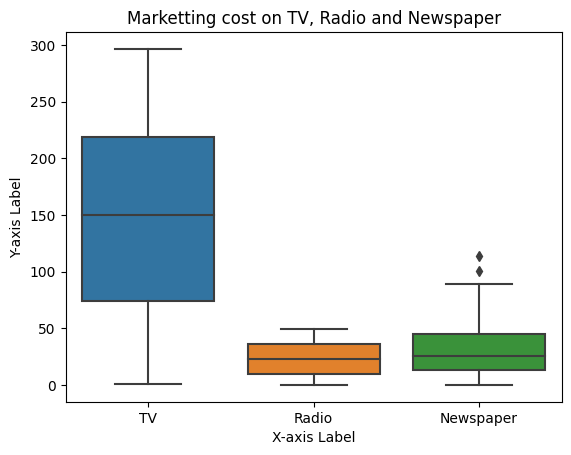

In [39]:
sns.boxplot(df[["TV","Radio","Newspaper"]])
plt.title('Marketting cost on TV, Radio and Newspaper')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


Here, we can see 2 outliers in Newspaper column. Let's remove it

In [40]:
def remove_outliers(Newspaper):
    Q1 = df["Newspaper"].quantile(0.25)
    Q3 = df["Newspaper"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df["Newspaper"] >= lower_bound) & (df["Newspaper"] <= upper_bound)]

# Remove outliers from 
df = remove_outliers(df["Newspaper"])

In [41]:
df.shape

(198, 4)

<AxesSubplot:>

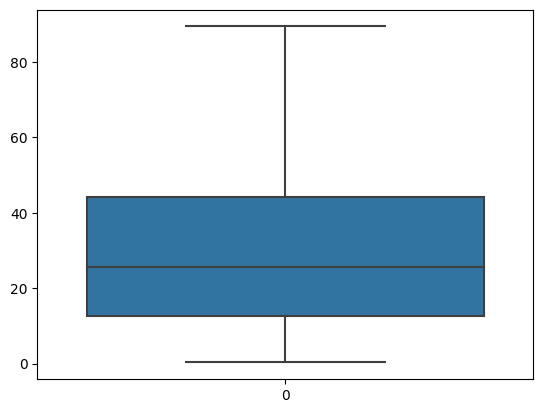

In [42]:
sns.boxplot(df["Newspaper"])

Let's visualise each columns in the dataset

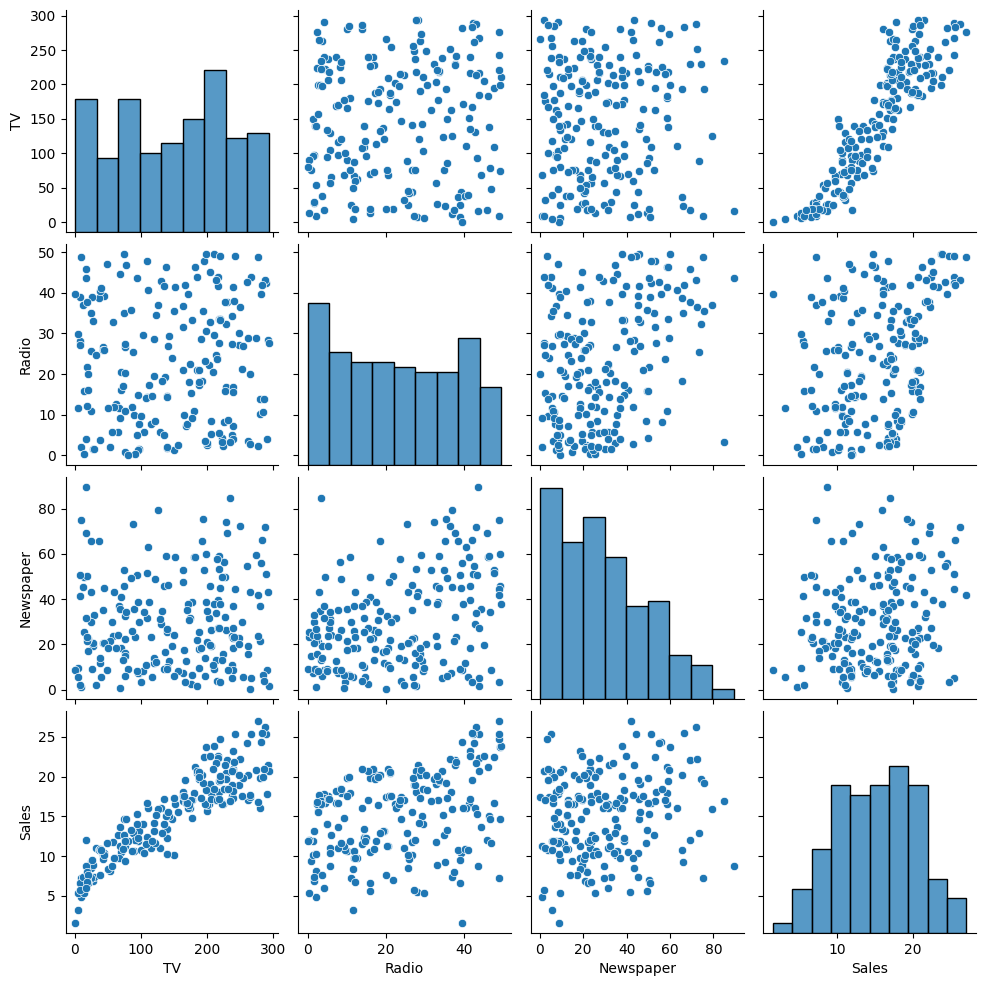

In [43]:
sns.pairplot(df)

here, we can see TV ans sales has linear correlation.

Lets visualize with regression line on each columns with Sales(Targer variable)

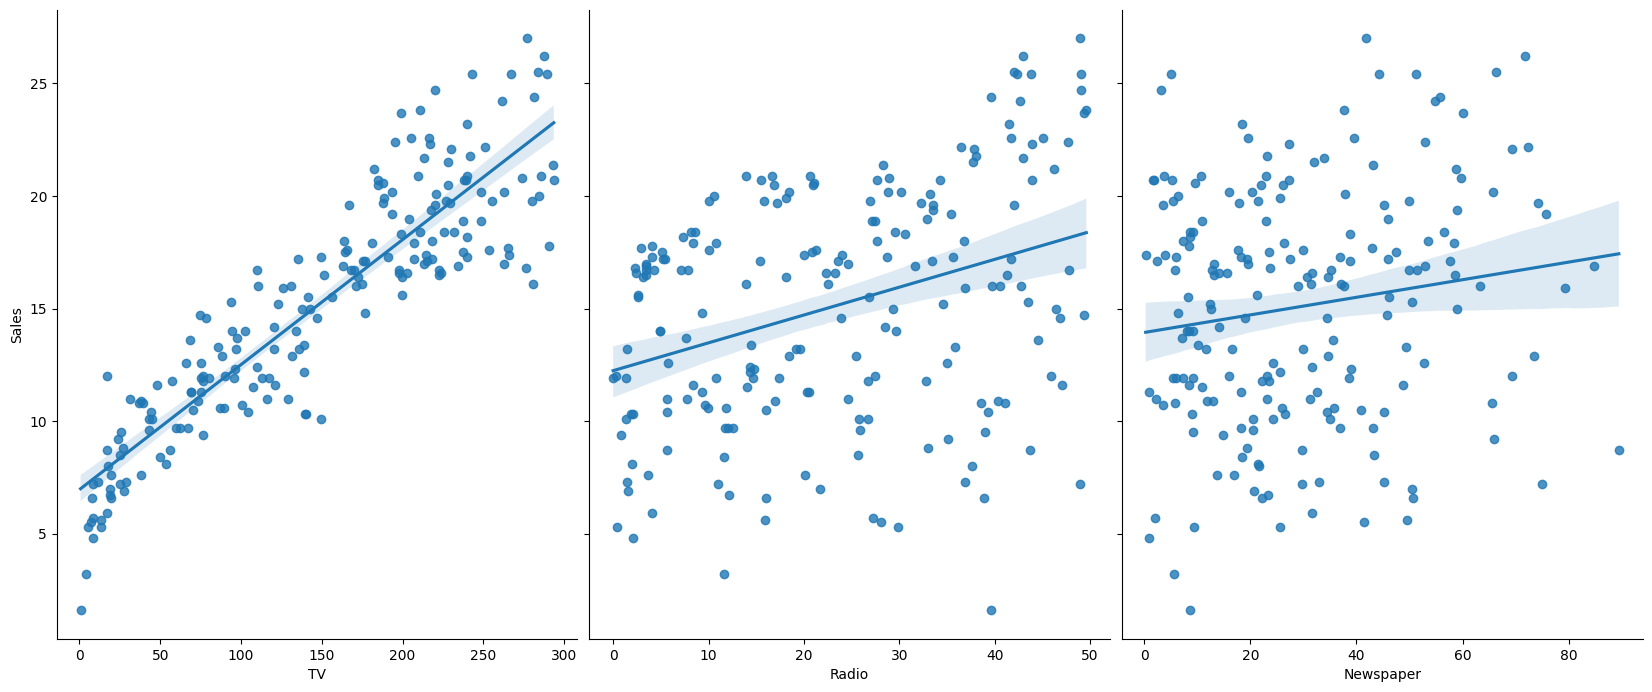

In [44]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.8, kind='reg')

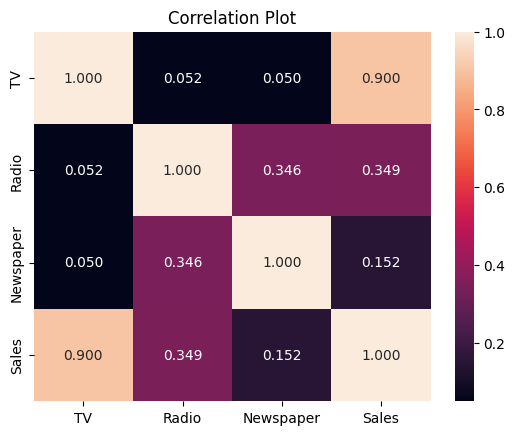

In [45]:
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Plot")
plt.show()

here we can see, some positive correlation between the each columns tv,radio and newspaper  with sales. Where correaltion value
are 0.900, 0.349, 0.152 respectively. here we can see that Newspaper is least affecting factors in sales.

## Preparing Model

In [46]:
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

In [47]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [48]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
X_train.head(5)

,TV,Radio,Newspaper
83,68.4,44.5,35.6
123,123.1,34.6,12.4
127,80.2,0.0,9.2
133,219.8,33.5,45.1
156,93.9,43.5,50.5


## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [53]:
#Getting the y-intercept and coefficients for tv, radio and newspaper respectively
print(linReg.intercept_)
print(linReg.coef_)

4.698891333931705
[ 0.05473982  0.11097262 -0.00376147]


In [54]:
y_pred=linReg.predict(X_test)

In [55]:
print(y_pred)

[15.37666813 21.24287186 20.56699523 20.11140686 13.57386444 12.29703439
 18.04772973 16.82149944 15.72531541 23.53518564 11.24656554  7.94652755
 18.33962865 12.49566411 19.60051972 22.21165927 13.8092896  24.15074382
 13.81987539 10.69299089  8.2960976  14.65683649 18.27612712 16.85742809
 21.45611265 16.66223208  8.169262   21.07731804 21.41365975 17.7048101
 13.17747335 19.5271478  16.92418492 17.15573072  8.65395381 19.37596997
  8.76198539  9.14484699 20.31075369 20.48946496  5.36407833  7.14864297
 14.22268923 17.17471565 15.34246891  9.64895691 21.88308308 10.47338934
 16.94565742 15.84469381  9.09900009 21.57127889 21.2289959   9.59339704
 18.41814671 13.41004846 21.52434254 20.70449646 15.82047546  9.50459925]


Evaluating the model
Using RMSE:Root Mean Squared Error and R2_score

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean squared error: 2.74
R2 score : 0.89


## RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfRegres=RandomForestRegressor()
rfRegres.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred_rf=rfRegres.predict(X_test)

In [63]:
print(y_pred_rf)

[14.886 21.375 19.799 19.276 13.834 12.129 17.663 15.12  14.62  25.256
 12.448  7.02  18.722 12.957 21.783 20.847 12.321 25.187 12.389 10.976
  9.963 16.961 18.736 17.515 19.922 16.976  5.541 17.402 17.325 18.422
 13.501 19.022 19.614 17.058  9.656 16.805  7.568  7.497 19.011 23.778
  6.03   9.402 12.547 16.028 13.246  7.979 17.917  7.815 17.217 16.628
  5.155 19.426 22.154 11.239 19.339 12.269 19.862 19.49  15.122 11.243]


Evaluating using Mean Squared Error, r2_score

In [64]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rf))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

Mean squared error: 2.06
R2 score : 0.92


Hyperparamater tuning

In [95]:
rfRegres=RandomForestRegressor(n_estimators=200, max_depth=15)
rfRegres.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200)

In [96]:
y_pred_rf=rfRegres.predict(X_test)
print(y_pred_rf)

[14.8385     21.618      19.5375     19.2175     13.7145     11.7635
 18.0055     15.294      14.7265     25.3285     12.5635      6.9745
 18.5995     13.0905     21.7335     20.636      12.1085     25.197
 12.3365     11.0055      9.85       16.9405     19.0265     17.523
 19.936      16.853       5.6175     17.391      16.9875     18.164
 13.685      18.893      19.8575     17.1035      9.6155     16.864
  7.53        7.409      18.9925     23.705       6.0075      9.3925
 12.538      15.9        13.466       7.9175     17.456       7.842
 17.3735     16.581       5.5505     19.463      22.1955     11.1955
 18.97       12.37233333 19.901      19.562      14.997      11.587     ]


In [97]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rf))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

Mean squared error: 2.21
R2 score : 0.91


It seems default hyperparamater of n_estimators=100 and max_depth=20 give better results.

## XBoost Regressor